In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
data =np.array([["Joel_1", "'word', 'lord', 'came', 'joel', 'son', 'pethuel.hear', ',', 'old', 'men', ',', 'give', 'ear', ',', 'inhabitants', 'land', '.', 'days', ',', 'even', 'days', 'fathers', '?', 'tell', 'children', ',', 'let', 'children', 'tell', 'children', ',', 'children', 'another', 'generation.that', 'palmerworm', 'left', 'locust', 'eaten', ';', 'locust', 'left', 'cankerworm', 'eaten', ';', 'cankerworm', 'left', 'caterpillar', 'eaten.awake', ',', 'drunkards', ',', 'weep', ';', 'howl', ',', 'drinkers', 'wine', ',', 'new', 'wine', ';', 'cut', 'mouth.for', 'nation', 'come', 'land', ',', 'strong', ',', 'without', 'number', ',', 'whose', 'teeth', 'teeth', 'lion', ',', 'cheek', 'teeth', 'great', 'lion.he', 'laid', 'vine', 'waste', ',', 'barked', 'fig', 'tree', ':', 'made', 'clean', 'bore', ',', 'cast', 'away', ';', 'branches', 'thereof', 'made', 'white.lament', 'like', 'virgin', 'girded', 'sackcloth', 'husband', 'youth.the', 'meat', 'offering', 'drink', 'offering', 'cut', 'house', 'lord', ';', 'priests', ',', 'lord', ', 'ministers', ',', 'mourn.the', 'field', 'wasted', ',', 'land', 'mourns', ';', 'corn', 'wasted', ':', 'new', 'wine', 'dried', ',', 'oil', 'languishes.be', 'ashamed', ',', 'farmers', ';', 'howl', ',', 'vinedressers', ',', 'wheat', 'barley', ';', 'harvest', 'field', 'perished.the', 'vine', 'dried', ',', 'fig', 'tree', 'languishes', ';', 'pomegranate', 'tree', ',', 'palm', 'tree', 'also', ',', 'apple', 'tree', ',', 'even', 'trees', 'field', ',', 'withered', ':', 'joy', 'withered', 'away', 'sons', 'men.gird', ',', 'lament', ',', 'priests', ':', 'howl', ',', 'ministers', 'altar', ':', 'come', ',', 'lie', 'night', 'sackcloth', ',', 'ministers', 'god', ':', 'meat', 'offering', 'drink', 'offering', 'withheld', 'house', 'god.sanctify', 'fast', ',', 'call', 'solemn', 'assembly', ',', 'gather', 'elders', 'inhabitants', 'land', 'house', 'lord', 'god', ',', 'cry', 'lord', ',', 'alas', 'day', '!', 'day', 'lord', 'hand', ',', 'destruction', 'almighty', 'shall', 'come.is', 'meat', 'cut', 'eyes', ',', 'yes', ',', 'joy', 'gladness', 'house', 'god', '?', 'seed', 'rotten', 'clods', ',', 'garners', 'laid', 'desolate', ',', 'barns', 'broken', ';', 'corn', 'withered.how', 'beasts', 'groan', '!', 'herds', 'cattle', 'perplexed', ',', 'pasture', ';', 'yes', ',', 'flocks', 'sheep', 'made', 'desolate.o', 'lord', ',', 'cry', ':', 'fire', 'devoured', 'pastures', 'wilderness', ',', 'flame', 'burned', 'trees', 'field.the', 'beasts', 'field', 'cry', 'also', ':', 'rivers', 'waters', 'dried', ',', 'fire', 'devoured', 'pastures', 'wilderness', '.'"],
               ["Joel_2", "'blow', 'trumpet', 'zion', ',', 'sound', 'alarm', 'holy', 'mountain', ':', 'let', 'inhabitants', 'land', 'tremble', ':', 'day', 'lord', 'comes', ',', 'near', 'hand', ';', 'day', 'darkness', 'gloominess', ',', 'day', 'clouds', 'thick', 'darkness', ',', 'morning', 'spread', 'mountains', ':', 'great', 'people', 'strong', ';', 'ever', 'like', ',', 'neither', 'shall', ',', 'even', 'years', 'many', 'generations.a', 'fire', 'devours', ';', 'behind', 'flame', 'burns', ':', 'land', 'garden', 'eden', ',', 'behind', 'desolate', 'wilderness', ';', 'yes', ',', 'nothing', 'shall', 'escape', 'them.the', 'appearance', 'appearance', 'horses', ';', 'horsemen', ',', 'shall', 'run.like', 'noise', 'chariots', 'tops', 'mountains', 'shall', 'leap', ',', 'like', 'noise', 'flame', 'fire', 'devours', 'stubble', ',', 'strong', 'people', 'set', 'battle', 'arraybefore', 'face', 'people', 'shall', 'much', 'pained', ':', 'faces', 'shall', 'gather', 'blackness.they', 'shall', 'run', 'like', 'mighty', 'men', ';', 'shall', 'climb', 'wall', 'like', 'men', 'war', ';', 'shall', 'march', 'every', 'one', 'ways', ',', 'shall', 'break', 'ranks', ':', 'neither', 'shall', 'one', 'thrust', 'another', ';', 'shall', 'walk', 'every', 'one', 'path', ':', 'fall', 'sword', ',', 'shall', 'wounded.they', 'shall', 'run', 'fro', 'city', ';', 'shall', 'run', 'wall', ',', 'shall', 'climb', 'houses', ';', 'shall', 'enter', 'windows', 'like', 'thief.the', 'earth', 'shall', 'quake', ';', 'heavens', 'shall', 'tremble', ':', 'sun', 'moon', 'shall', 'dark', ',', 'stars', 'shall', 'withdraw', 'shining', ':', 'lord', 'shall', 'utter', 'voice', 'army', ':', 'camp', 'great', ':', 'strong', 'executes', 'word', ':', 'day', 'lord', 'great', 'terrible', ';', 'abide', '?', 'therefore', 'also', ',', 'said', 'lord', ',', 'turn', 'even', 'heart', ',', 'fasting', ',', 'weeping', ',', 'mourning', ':', 'rend', 'heart', ',', 'garments', ',', 'turn', 'lord', 'god', ':', 'gracious', 'merciful', ',', 'slow', 'anger', ',', 'great', 'kindness', ',', 'repents', 'evil.who', 'knows', 'return', 'repent', ',', 'leave', 'blessing', 'behind', ';', 'even', 'meat', 'offering', 'drink', 'offering', 'lord', 'god', '?', 'blow', 'trumpet', 'zion', ',', 'sanctify', 'fast', ',', 'call', 'solemn', 'assembly', ':', 'gather', 'people', ',', 'sanctify', 'congregation', ',', 'assemble', 'elders', ',', 'gather', 'children', ',', 'suck', 'breasts', ':', 'let', 'bridegroom', 'go', 'forth', 'chamber', ',', 'bride', 'closet.let', 'priests', ',', 'ministers', 'lord', ',', 'weep', 'porch', 'altar', ',', 'let', 'say', ',', 'spare', 'people', ',', 'lord', ',', 'give', 'heritage', 'reproach', ',', 'heathen', 'rule', ':', 'say', 'among', 'people', ',', 'god', '?', 'lord', 'jealous', 'land', ',', 'pity', 'people.yes', ',', 'lord', 'answer', 'say', 'people', ',', 'behold', ',', 'send', 'corn', ',', 'wine', ',', 'oil', ',', 'shall', 'satisfied', 'therewith', ':', 'make', 'reproach', 'among', 'heathen', ':', 'remove', 'far', 'northern', 'army', ',', 'drive', 'land', 'barren', 'desolate', ',', 'face', 'toward', 'east', 'sea', ',', 'hinder', 'part', 'toward', 'utmost', 'sea', ',', 'stink', 'shall', 'come', ',', 'ill', 'smell', 'shall', 'come', ',', 'done', 'great', 'things.fear', ',', 'land', ';', 'glad', 'rejoice', ':', 'lord', 'great', 'things.be', 'afraid', ',', 'beasts', 'field', ':', 'pastures', 'wilderness', 'spring', ',', 'tree', 'bears', 'fruit', ',', 'fig', 'tree', 'vine', 'yield', 'strength.be', 'glad', ',', 'children', 'zion', ',', 'rejoice', 'lord', 'god', ':', 'given', 'former', 'rain', 'moderately', ',', 'cause', 'come', 'rain', ',', 'former', 'rain', ',', 'latter', 'rain', 'first', 'month.and', 'floors', 'shall', 'full', 'wheat', ',', 'vats', 'shall', 'overflow', 'wine', 'oil.and', 'restore', 'years', 'locust', 'eaten', ',', 'cankerworm', ',', 'caterpillar', ',', 'palmerworm', ',', 'great', 'army', 'sent', 'among', 'you.and', 'shall', 'eat', 'plenty', ',', 'satisfied', ',', 'praise', 'name', 'lord', 'god', ',', 'dealt', 'wondrously', ':', 'people', 'shall', 'never', 'ashamed.and', 'shall', 'know', 'middle', 'israel', ',', 'lord', 'god', ',', 'none', 'else', ':', 'people', 'shall', 'never', 'ashamed.and', 'shall', 'come', 'pass', 'afterward', ',', 'pour', 'spirit', 'flesh', ';', 'sons', 'daughters', 'shall', 'prophesy', ',', 'old', 'men', 'shall', 'dream', 'dreams', ',', 'young', 'men', 'shall', 'see', 'visions', ':', 'also', 'servants', 'handmaids', 'days', 'pour', 'spirit.and', 'show', 'wonders', 'heavens', 'earth', ',', 'blood', ',', 'fire', ',', 'pillars', 'smoke.the', 'sun', 'shall', 'turned', 'darkness', ',', 'moon', 'blood', ',', 'great', 'terrible', 'day', 'lord', 'come.and', 'shall', 'come', 'pass', ',', 'whoever', 'shall', 'call', 'name', 'lord', 'shall', 'delivered', ':', 'mount', 'zion', 'jerusalem', 'shall', 'deliverance', ',', 'lord', 'said', ',', 'remnant', 'lord', 'shall', 'call', '.'"],
               ["Joel_3", "',', 'behold', ',', 'days', ',', 'time', ',', 'shall', 'bring', 'captivity', 'judah', 'jerusalem', ',', 'also', 'gather', 'nations', ',', 'bring', 'valley', 'jehoshaphat', ',', 'plead', 'people', 'heritage', 'israel', ',', 'scattered', 'among', 'nations', ',', 'parted', 'land.and', 'cast', 'lots', 'people', ';', 'given', 'boy', 'harlot', ',', 'sold', 'girl', 'wine', ',', 'might', 'drink.yes', ',', ',', 'tyre', ',', 'zidon', ',', 'coasts', 'palestine', '?', 'render', 'recompense', '?', 'recompense', ',', 'swiftly', 'speedily', 'return', 'recompense', 'head', ';', 'taken', 'silver', 'gold', ',', 'carried', 'temples', 'goodly', 'pleasant', 'things', ':', 'children', 'also', 'judah', 'children', 'jerusalem', 'sold', 'grecians', ',', 'might', 'remove', 'far', 'border.behold', ',', 'raise', 'place', 'sold', ',', 'return', 'recompense', 'head', ':', 'sell', 'sons', 'daughters', 'hand', 'children', 'judah', ',', 'shall', 'sell', 'sabeans', ',', 'people', 'far', ':', 'lord', 'spoken', 'it.proclaim', 'among', 'gentiles', ';', 'prepare', 'war', ',', 'wake', 'mighty', 'men', ',', 'let', 'men', 'war', 'draw', 'near', ';', 'let', 'come', ':', 'beat', 'plowshares', 'swords', 'pruning', 'hooks', 'spears', ':', 'let', 'weak', 'say', ',', 'strong.assemble', ',', 'come', ',', 'heathen', ',', 'gather', 'together', 'round', ':', 'thither', 'cause', 'mighty', 'ones', 'come', ',', 'lord.let', 'heathen', 'wakened', ',', 'come', 'valley', 'jehoshaphat', ':', 'sit', 'judge', 'heathen', 'round', 'about.put', 'sickle', ',', 'harvest', 'ripe', ':', 'come', ',', 'get', ';', 'press', 'full', ',', 'fats', 'overflow', ';', 'wickedness', 'great.multitudes', ',', 'multitudes', 'valley', 'decision', ':', 'day', 'lord', 'near', 'valley', 'decision.the', 'sun', 'moon', 'shall', 'darkened', ',', 'stars', 'shall', 'withdraw', 'shining.the', 'lord', 'also', 'shall', 'roar', 'zion', ',', 'utter', 'voice', 'jerusalem', ';', 'heavens', 'earth', 'shall', 'shake', ':', 'lord', 'hope', 'people', ',', 'strength', 'children', 'israel.so', 'shall', 'know', 'lord', 'god', 'dwelling', 'zion', ',', 'holy', 'mountain', ':', 'shall', 'jerusalem', 'holy', ',', 'shall', 'strangers', 'pass', 'more.and', 'shall', 'come', 'pass', 'day', ',', 'mountains', 'shall', 'drop', 'new', 'wine', ',', 'hills', 'shall', 'flow', 'milk', ',', 'rivers', 'judah', 'shall', 'flow', 'waters', ',', 'fountain', 'shall', 'come', 'forth', 'house', 'lord', ',', 'shall', 'water', 'valley', 'shittim.egypt', 'shall', 'desolation', ',', 'edom', 'shall', 'desolate', 'wilderness', ',', 'violence', 'children', 'judah', ',', 'shed', 'innocent', 'blood', 'land.but', 'judah', 'shall', 'dwell', 'ever', ',', 'jerusalem', 'generation', 'generation.for', 'cleanse', 'blood', 'cleansed', ':', 'lord', 'dwells', 'zion', '.'"],
               ["Malaquias1", "'burden', 'word', 'lord', 'israel', 'malachi.i', 'loved', ',', 'said', 'lord', '.', 'yet', 'say', ',', 'wherein', 'loved', 'us', '?', 'esau', 'jacob', ', 'brother', '?', 'said', 'lord', ':', 'yet', 'loved', 'jacob', ',', 'hated', 'esau', ',', 'laid', 'mountains', 'heritage', 'waste', 'dragons', 'wilderness.whereas', 'edom', 'said', ',', 'impoverished', ',', 'return', 'build', 'desolate', 'places', ';', 'thus', 'said', 'lord', 'hosts', ',', 'shall', 'build', ',', 'throw', ';', 'shall', 'call', ',', 'border', 'wickedness', ',', ',', 'people', 'lord', 'indignation', 'ever.and', 'eyes', 'shall', 'see', ',', 'shall', 'say', ',', 'lord', 'magnified', 'border', 'israel.a', 'son', 'honors', 'father', ',', 'servant', 'master', ':', 'father', ',', 'honor', '?', 'master', ',', 'fear', '?', 'said', 'lord', 'hosts', ',', 'priests', ',', 'despise', 'name', '.', 'say', ',', 'wherein', 'despised', 'name', '?', 'offer', 'polluted', 'bread', 'altar', ';', 'say', ',', 'wherein', 'polluted', '?', 'say', ',', 'table', 'lord', 'contemptible.and', 'offer', 'blind', 'sacrifice', ',', 'evil', '?', 'offer', 'lame', 'sick', ',', 'evil', '?', 'offer', 'governor', ';', 'pleased', ',', 'accept', 'person', '?', 'said', 'lord', 'hosts.and', ',', 'pray', ',', 'beseech', 'god', 'gracious', 'us', ':', 'means', ':', 'regard', 'persons', '?', 'said', 'lord', 'hosts.who', 'even', 'among', 'would', 'shut', 'doors', 'nothing', '?', 'neither', 'kindle', 'fire', 'altar', 'nothing', '.', 'pleasure', ',', 'said', 'lord', 'hosts', ',', 'neither', 'accept', 'offering', 'hand.for', 'rising', 'sun', 'even', 'going', 'name', 'shall', 'great', 'among', 'gentiles', ';', 'every', 'place', 'incense', 'shall', 'offered', 'name', ',', 'pure', 'offering', ':', 'name', 'shall', 'great', 'among', 'heathen', ',', 'said', 'lord', 'hosts.but', 'profaned', ',', 'say', ',', 'table', 'lord', 'polluted', ';', 'fruit', 'thereof', ',', 'even', 'meat', ',', 'contemptible.you', 'said', 'also', ',', 'behold', ',', 'weariness', '!', 'snuffed', ',', 'said', 'lord', 'hosts', ';', 'brought', 'torn', ',', 'lame', ',', 'sick', ';', 'thus', 'brought', 'offering', ':', 'accept', 'hand', '?', 'said', 'lord.but', 'cursed', 'deceiver', ',', 'flock', 'male', ',', 'vows', ',', 'sacrifices', 'lord', 'corrupt', 'thing', ':', 'great', 'king', ',', 'said', 'lord', 'hosts', ',', 'name', 'dreadful', 'among', 'heathen', '.'"],
               ["Malaquias_2", "',', 'priests', ',', 'commandment', 'you.if', 'hear', ',', 'lay', 'heart', ',', 'give', 'glory', 'name', ',', 'said', 'lord', 'hosts', ',', 'even', 'send', 'curse', ',', 'curse', 'blessings', ':', 'yes', ',', 'cursed', 'already', ',', 'lay', 'heart.behold', ',', 'corrupt', 'seed', ',', 'spread', 'dung', 'faces', ',', 'even', 'dung', 'solemn', 'feasts', ';', 'one', 'shall', 'take', 'away', 'it.and', 'shall', 'know', 'sent', 'commandment', ',', 'covenant', 'might', 'levi', ',', 'said', 'lord', 'hosts.my', 'covenant', 'life', 'peace', ';', 'gave', 'fear', 'feared', ',', 'afraid', 'name.the', 'law', 'truth', 'mouth', ',', 'iniquity', 'found', 'lips', ':', 'walked', 'peace', 'equity', ',', 'turn', 'many', 'away', 'iniquity.for', 'priest', ', 'lips', 'keep', 'knowledge', ',', 'seek', 'law', 'mouth', ':', 'messenger', 'lord', 'hosts.but', 'departed', 'way', ';', 'caused', 'many', 'stumble', 'law', ';', 'corrupted', 'covenant', 'levi', ',', 'said', 'lord', 'hosts.therefore', 'also', 'made', 'contemptible', 'base', 'people', ',', 'according', 'kept', 'ways', ',', 'partial', 'law.have', 'one', 'father', '?', 'one', 'god', 'created', 'us', '?', 'deal', 'treacherously', 'every', 'man', 'brother', ',', 'profaning', 'covenant', 'fathers', '?', 'judah', 'dealt', 'treacherously', ',', 'abomination', 'committed', 'israel', 'jerusalem', ';', 'judah', 'profaned', 'holiness', 'lord', 'loved', ',', 'married', 'daughter', 'strange', 'god.the', 'lord', 'cut', 'man', ',', 'master', 'scholar', ',', 'tabernacles', 'jacob', ',', 'offers', 'offering', 'lord', 'hosts.and', 'done', ',', 'covering', 'altar', 'lord', 'tears', ',', 'weeping', ',', 'crying', ',', 'regards', 'offering', ',', 'receives', 'good', 'hand.yet', 'say', ',', '?', 'lord', 'witness', 'wife', 'youth', ',', 'dealt', 'treacherously', ':', 'yet', 'companion', ',', 'wife', 'covenant.and', 'make', 'one', '?', 'yet', 'residue', 'spirit', '.', 'one', '?', 'might', 'seek', 'godly', 'seed', '.', 'therefore', 'take', 'heed', 'spirit', ',', 'let', 'none', 'deal', 'treacherously', 'wife', 'youth.for', 'lord', ',', 'god', 'israel', ',', 'said', 'hates', 'putting', 'away', ':', 'one', 'covers', 'violence', 'garment', ',', 'said', 'lord', 'hosts', ':', 'therefore', 'take', 'heed', 'spirit', ',', 'deal', 'treacherously.you', 'wearied', 'lord', 'words', '.', 'yet', 'say', ',', 'wherein', 'wearied', '?', 'say', ',', 'every', 'one', 'evil', 'good', 'sight', 'lord', ',', 'delights', ';', ',', 'god', 'judgment', '?'"],
               ["Malaquias_3", "'behold', ',', 'send', 'messenger', ',', 'shall', 'prepare', 'way', ':', 'lord', ',', 'seek', ',', 'shall', 'suddenly', 'come', 'temple', ',', 'even', 'messenger', 'covenant', ',', 'delight', ':', 'behold', ',', 'shall', 'come', ',', 'said', 'lord', 'hosts.but', 'may', 'abide', 'day', 'coming', '?', 'shall', 'stand', 'appears', '?', 'like', 'refiner', ', 'fire', ',', 'like', fullers'soap, ':', 'shall', 'sit', 'refiner', 'purifier', 'silver', ':', 'shall', 'purify', 'sons', 'levi', ',', 'purge', 'gold', 'silver', ',', 'may', 'offer', 'lord', 'offering', 'righteousness.then', 'shall', 'offering', 'judah', 'jerusalem', 'pleasant', 'lord', ',', 'days', 'old', ',', 'former', 'years.and', 'come', 'near', 'judgment', ';', 'swift', 'witness', 'sorcerers', ',', 'adulterers', ',', 'false', 'swearers', ',', 'oppress', 'hireling', 'wages', ',', 'widow', ',', 'fatherless', ',', 'turn', 'aside', 'stranger', 'right', ',', 'fear', ',', 'said', 'lord', 'hosts.for', 'lord', ',', 'change', ';', 'therefore', 'sons', 'jacob', 'consumed.even', 'days', 'fathers', 'gone', 'away', 'ordinances', ',', 'kept', '.', 'return', ',', 'return', ',', 'said', 'lord', 'hosts', '.', 'said', ',', 'wherein', 'shall', 'return', '?', 'man', 'rob', 'god', '?', 'yet', 'robbed', '.', 'say', ',', 'wherein', 'robbed', '?', 'tithes', 'offerings.you', 'cursed', 'curse', ':', 'robbed', ',', 'even', 'whole', 'nation.bring', 'tithes', 'storehouse', ',', 'may', 'meat', 'house', ',', 'prove', 'herewith', ',', 'said', 'lord', 'hosts', ',', 'open', 'windows', 'heaven', ',', 'pour', 'blessing', ',', 'shall', 'room', 'enough', 'receive', 'it.and', 'rebuke', 'devourer', 'sakes', ',', 'shall', 'destroy', 'fruits', 'ground', ';', 'neither', 'shall', 'vine', 'cast', 'fruit', 'time', 'field', ',', 'said', 'lord', 'hosts.and', 'nations', 'shall', 'call', 'blessed', ':', 'shall', 'delightsome', 'land', ',', 'said', 'lord', 'hosts.your', 'words', 'stout', ',', 'said', 'lord', '.', 'yet', 'say', ',', 'spoken', 'much', '?', 'said', ',', 'vain', 'serve', 'god', ':', 'profit', 'kept', 'ordinance', ',', 'walked', 'mournfully', 'lord', 'hosts', '?', 'call', 'proud', 'happy', ';', 'yes', ',', 'work', 'wickedness', 'set', ';', 'yes', ',', 'tempt', 'god', 'even', 'delivered.then', 'feared', 'lord', 'spoke', 'often', 'one', 'another', ':', 'lord', 'listened', ',', 'heard', ',', 'book', 'remembrance', 'written', 'feared', 'lord', ',', 'thought', 'name.and', 'shall', 'mine', ',', 'said', 'lord', 'hosts', ',', 'day', 'make', 'jewels', ';', 'spare', ',', 'man', 'spares', 'son', 'serves', 'him.then', 'shall', 'return', ',', 'discern', 'righteous', 'wicked', ',', 'serves', 'god', 'serves', '.'"],
               ["Malaquias_4", "',', 'behold', ',', 'day', 'comes', ',', 'shall', 'burn', 'oven', ';', 'proud', ',', 'yes', ',', 'wickedly', ',', 'shall', 'stubble', ':', 'day', 'comes', 'shall', 'burn', ',', 'said', 'lord', 'hosts', ',', 'shall', 'leave', 'neither', 'root', 'branch.but', 'fear', 'name', 'shall', 'sun', 'righteousness', 'arise', 'healing', 'wings', ';', 'shall', 'go', 'forth', ',', 'grow', 'calves', 'stall.and', 'shall', 'tread', 'wicked', ';', 'shall', 'ashes', 'soles', 'feet', 'day', 'shall', ',', 'said', 'lord', 'hosts.remember', 'law', 'moses', 'servant', ',', 'commanded', 'horeb', 'israel', ',', 'statutes', 'judgments.behold', ',', 'send', 'elijah', 'prophet', 'coming', 'great', 'dreadful', 'day', 'lord', ':', 'shall', 'turn', 'heart', 'fathers', 'children', ',', 'heart', 'children', 'fathers', ',', 'lest', 'come', 'smite', 'earth', 'curse', '.'"]])

In [7]:
df = pd.DataFrame(data, index=range(100,107),columns=['Autor', 'Livro'])

In [8]:
print(df)

           Autor                                              Livro
100       Joel_1  'word', 'lord', 'came', 'joel', 'son', 'pethue...
101       Joel_2  'blow', 'trumpet', 'zion', ',', 'sound', 'alar...
102       Joel_3  ',', 'behold', ',', 'days', ',', 'time', ',', ...
103   Malaquias1  'burden', 'word', 'lord', 'israel', 'malachi.i...
104  Malaquias_2  ',', 'priests', ',', 'commandment', 'you.if', ...
105  Malaquias_3  'behold', ',', 'send', 'messenger', ',', 'shal...
106  Malaquias_4  ',', 'behold', ',', 'day', 'comes', ',', 'shal...


In [9]:
corpus = df['Livro'].tolist()

In [10]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

7 rows


,0,1,2,3,4,5,6
devoured pastures wilderness,0.129111,0.000000,0.0,0.0,0.0,0.0,0.0
fire devoured pastures,0.129111,0.000000,0.0,0.0,0.0,0.0,0.0
meat offering drink,0.107173,0.038111,0.0,0.0,0.0,0.0,0.0
offering drink offering,0.107173,0.038111,0.0,0.0,0.0,0.0,0.0
alas day day,0.064555,0.000000,0.0,0.0,0.0,0.0,0.0
almighty shall come,0.064555,0.000000,0.0,0.0,0.0,0.0,0.0
also apple tree,0.064555,0.000000,0.0,0.0,0.0,0.0,0.0
also rivers waters,0.064555,0.000000,0.0,0.0,0.0,0.0,0.0
altar come lie,0.064555,0.000000,0.0,0.0,0.0,0.0,0.0
another generation that,0.064555,0.000000,0.0,0.0,0.0,0.0,0.0


In [11]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [12]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [13]:
k = 2
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


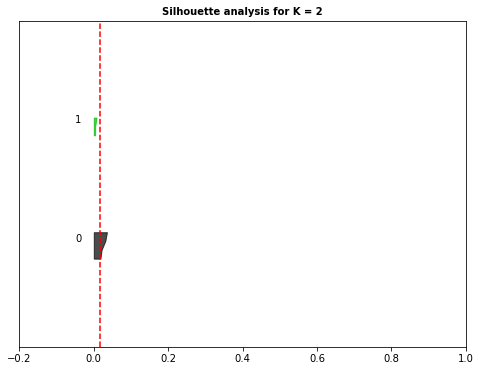

In [14]:
silhouette(kmeans_results, final_df, plot=True)

In [15]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

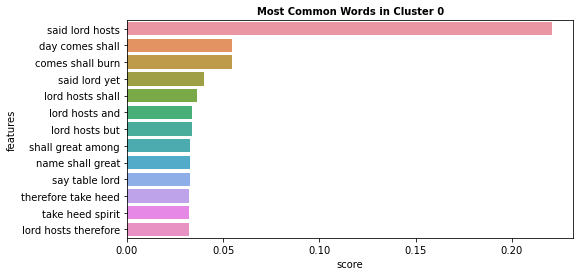

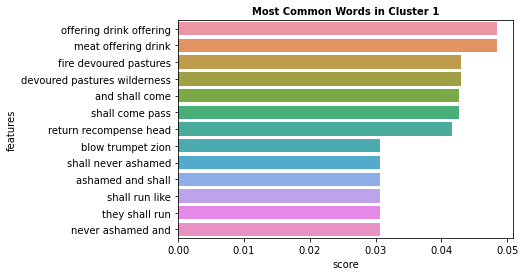

In [16]:
best_result = 2
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [17]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

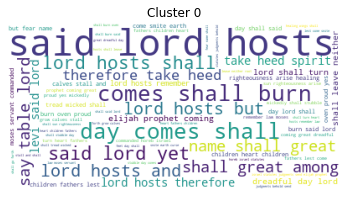

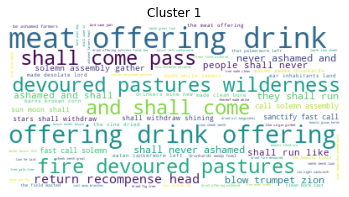

In [18]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [19]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Joel_1,"'word', 'lord', 'came', 'joel', 'son', 'pethue...",1
101,Joel_2,"'blow', 'trumpet', 'zion', ',', 'sound', 'alar...",1
102,Joel_3,"',', 'behold', ',', 'days', ',', 'time', ',', ...",1
103,Malaquias1,"'burden', 'word', 'lord', 'israel', 'malachi.i...",0
104,Malaquias_2,"',', 'priests', ',', 'commandment', 'you.if', ...",0


In [20]:
print(df)

           Autor                                              Livro  label
100       Joel_1  'word', 'lord', 'came', 'joel', 'son', 'pethue...      1
101       Joel_2  'blow', 'trumpet', 'zion', ',', 'sound', 'alar...      1
102       Joel_3  ',', 'behold', ',', 'days', ',', 'time', ',', ...      1
103   Malaquias1  'burden', 'word', 'lord', 'israel', 'malachi.i...      0
104  Malaquias_2  ',', 'priests', ',', 'commandment', 'you.if', ...      0
105  Malaquias_3  'behold', ',', 'send', 'messenger', ',', 'shal...      0
106  Malaquias_4  ',', 'behold', ',', 'day', 'comes', ',', 'shal...      0
